# Word Embedding - Home Assigment
## Dr. Omri Allouche 2018. YData Deep Learning Course

[Open in Google Colab](https://colab.research.google.com/github/omriallouche/deep_learning_course/blob/master/DL_word_embedding_assignment.ipynb)
    
    
In this exercise, you'll use word vectors trained on a corpus of 380,000 lyrics of songs from MetroLyrics (https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics).  
The dataset contains these fields for each song, in CSV format:
1. index
1. song
1. year
1. artist
1. genre
1. lyrics

Before doing this exercise, we recommend that you go over the "Bag of words meets bag of popcorn" tutorial (https://www.kaggle.com/c/word2vec-nlp-tutorial)

Other recommended resources:
- https://rare-technologies.com/word2vec-tutorial/
- https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

### Train word vectors
Train word vectors using the Skipgram Word2vec algorithm and the gensim package.
Make sure you perform the following:
- Tokenize words
- Lowercase all words
- Remove punctuation marks
- Remove rare words
- Remove stopwords

Use 300 as the dimension of the word vectors. Try different context sizes.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas  as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import pandas as pd 
MIN_OCCURENCES = 5
lyrics_df = pd.read_csv("/content/drive/My Drive/lyrics.csv")
#lyrics_df = pd.read_csv('../lyrics.csv', header=0, encoding='utf-8')
# converters={'lyrics': lambda x: str(x)},
# lyrics_df = pd.read_csv('../lyrics.csv', header=0)
# lyrics_df['Collyricsumn'] =lyrics_df['lyrics'].astype(str)
lyrics_df.sample(10)


index                                song  year  \
223114  223114          while-i-still-got-the-time  2008   
39186    39186                               f-m-l  2014   
239845  239845                        pantie-lover  2014   
137019  137019                     chocolate-brown  2001   
354490  354490                            i-m-good  2015   
75862    75862  falling-out-of-love-at-this-volume  2000   
194927  194927                     peking-hooligan  2007   
68991    68991                               thumb  2006   
28682    28682          you-treat-me-like-a-secret  2014   
343370  343370       love-has-finally-come-at-last  2009   

                      artist          genre  \
223114         darius-rucker        Country   
39186   the-amity-affliction  Not Available   
239845             asap-ferg        Hip-Hop   
137019           cranberries           Rock   
354490              amir-obe          Other   
75862            bright-eyes           Rock   
194927             buzzcocks           Rock   
68991            dinosaur-jr           Rock   
28682           candi-staton     Electronic   
343370          bobby-womack            R&B   

                                                   lyrics  
223114  Thirty nine candles burnt out on a cake\nEach ...  
39186   There are parts of me\nThat have been lost at ...  
239845  [Hook]\nEvery time I walk up in the club, I go...  
137019  But I tried and I sighed\nhe didn't listen to ...  
354490                                                NaN  
75862   Tell me what you wanted to hear\nLet me do the...  
194927  You know me cos I hang around the bicycle shed...  
68991   There never really is a good time\nThere's alw...  
28682                                                 NaN  
343370  Love has finally come at last\nAnd I'm never g...

In [6]:
lyrics_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362237 entries, 0 to 362236
Data columns (total 6 columns):
index     362237 non-null int64
song      362235 non-null object
year      362237 non-null int64
artist    362237 non-null object
genre     362237 non-null object
lyrics    266557 non-null object
dtypes: int64(2), object(4)
memory usage: 16.6+ MB


In [7]:
lyrics_df.head()

index             song  year           artist genre  \
0      0        ego-remix  2009  beyonce-knowles   Pop   
1      1     then-tell-me  2009  beyonce-knowles   Pop   
2      2          honesty  2009  beyonce-knowles   Pop   
3      3  you-are-my-rock  2009  beyonce-knowles   Pop   
4      4    black-culture  2009  beyonce-knowles   Pop   

                                              lyrics  
0  Oh baby, how you doing?\nYou know I'm gonna cu...  
1  playin' everything so easy,\nit's like you see...  
2  If you search\nFor tenderness\nIt isn't hard t...  
3  Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...  
4  Party the people, the people the party it's po...

In [8]:
lyrics_df.describe(include = 'all')

index    song           year        artist   genre  \
count   362237.000000  362235  362237.000000        362237  362237   
unique            NaN  250472            NaN         18231      12   
top               NaN   intro            NaN  dolly-parton    Rock   
freq              NaN     366            NaN           755  131377   
mean    181118.000000     NaN    2008.537596           NaN     NaN   
std     104568.959068     NaN       9.908024           NaN     NaN   
min          0.000000     NaN      67.000000           NaN     NaN   
25%      90559.000000     NaN    2006.000000           NaN     NaN   
50%     181118.000000     NaN    2008.000000           NaN     NaN   
75%     271677.000000     NaN    2014.000000           NaN     NaN   
max     362236.000000     NaN    2038.000000           NaN     NaN   

              lyrics  
count         266557  
unique        244873  
top     INSTRUMENTAL  
freq            1369  
mean             NaN  
std              NaN  
min              NaN  
25%              NaN  
50%              NaN  
75%              NaN  
max              NaN

In [9]:
lyrics_df = lyrics_df[lyrics_df.lyrics.notnull()]
lyrics_df.sample(10)

index                        song  year             artist  \
225641  225641                 summer-rain  2008      anna-ternheim   
19677    19677                   love-club  2009           big-bang   
93346    93346  when-papa-played-the-dobro  2007  flatt-and-scruggs   
230134  230134        up-to-my-neck-in-you  2006              ac-dc   
81330    81330          we-will-meet-again  2001             bosson   
266356  266356                pre-approved  2012  classes-of-dynamo   
116995  116995                  no-control  2006        david-bowie   
240934  240934         addio-fioritoi-asil  2007     andrea-bocelli   
36431    36431          master-of-disguise  2006           arcturus   
120533  120533                 holla-at-me  2010        chris-brown   

                genre                                             lyrics  
225641          Indie  Last summer was mad, remember the rain\nI know...  
19677             Pop  We gettin down in the club\nAll my fella all m...  
93346         Country  My papa was a hobo when they delivered me\nWe ...  
230134           Rock  Well I've been up to my neck in trouble\nUp to...  
81330             Pop  It's hard to say goodbye, it hurts to be alone...  
266356  Not Available  Im coming with the news\nIm coming with the ne...  
116995           Rock  Stay away from the future\nBack away from the ...  
240934  Not Available  (Giacomo Puccini - MADAMA BUTTERFLY)\nAddio, f...  
36431           Metal  ("No! this face is only a mask a wicked orname...  
120533        Hip-Hop  Uh, Boom, Boom\nWe ballin' in the room\nSweepi...

In [0]:
import nltk
from nltk.tokenize import RegexpTokenizer

texts = lyrics_df["lyrics"].tolist()
tokenizer = RegexpTokenizer(r'\w+')
flat_list =  [word for word in [tokenizer.tokenize(text.lower()) for text  in texts]]
all_text = [item for sublist in flat_list for item in sublist]
req_dist = nltk.FreqDist(all_text)
rare_words = {word for (word, count) in req_dist.items() if count < MIN_OCCURENCES}


['',
 '/home/gabib3b/anaconda2/lib/python27.zip',
 '/home/gabib3b/anaconda2/lib/python2.7',
 '/home/gabib3b/anaconda2/lib/python2.7/plat-linux2',
 '/home/gabib3b/anaconda2/lib/python2.7/lib-tk',
 '/home/gabib3b/anaconda2/lib/python2.7/lib-old',
 '/home/gabib3b/anaconda2/lib/python2.7/lib-dynload',
 '/home/gabib3b/anaconda2/lib/python2.7/site-packages',
 '/home/gabib3b/anaconda2/lib/python2.7/site-packages/setuptools-40.6.3-py2.7.egg',
 '/home/gabib3b/anaconda2/lib/python2.7/site-packages/IPython/extensions',
 '/home/gabib3b/.ipython']

In [0]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
import string 

def cleanText(text, rare_words=None):
    
        #text = text1.translate(string.punctuation)
  table = str.maketrans({key: None for key in string.punctuation})
  text = text.translate(table)  
        
  tokens = word_tokenize(text)
  tokens = [w.lower() for w in tokens]

  stops = set(stopwords.words("english"))

  words = [word for word in tokens if word not in stops and (rare_words is None or word not in rare_words)]
  if len(words) == 0:
    return None

  return words
    

'string With Punctuation'

In [17]:
lyrics_df["clean_lyrics"] = lyrics_df["lyrics"].map(lambda text: cleanText(text, rare_words))
lyrics_df.sample(10)

index                   song  year            artist    genre  \
133661  133661  como-fingir-unplugged  2008      elvis-crespo      Pop   
302550  302550         wild-wild-west  2006       escape-club     Rock   
241658  241658         arc-of-the-sun  2009  assembly-of-dust     Rock   
280387  280387         one-step-ahead  2009     beres-hammond     Rock   
122470  122470                one-day  2008        dave-mason     Rock   
46030    46030  take-me-to-your-heart  2007        bananarama      Pop   
199895  199895             chloroform  2015           belasco     Rock   
344241  344241                excited  2013             avant  Hip-Hop   
166437  166437    shackles-and-chains  2007      arlo-guthrie     Rock   
177860  177860               assemble  2012          avengers     Rock   

                                                   lyrics  \
133661  Â¿CÃ³mo fingir que te olvide?\nSi por mas que ...   
302550  Forty-seven dead beats living in the back stre...   
241658  make yourself at home we've been expecting you...   
280387  One step ahead and you're up\nOne step behind ...   
122470  I know it's unbelievable\nAnd I know it seems ...   
46030   [Chorus]\nTake me to your heart now, baby\nTak...   
199895  Thought she was the most important person in t...   
344241  This feels good, hm\nMmm,\nYeah yeah\nAh, uh u...   
166437  On a long lonesome journey I'm going\nOh darli...   
177860  Verse 1\n(Thor)\nI'm mighty Thor\nAnd this is ...   

                                             clean_lyrics  
133661  [â¿cã³mo, fingir, que, te, olvide, si, por, ma...  
302550  [fortyseven, dead, beats, living, back, street...  
241658  [make, home, weve, expecting, weve, waiting, a...  
280387  [one, step, ahead, youre, one, step, behind, y...  
122470  [know, unbelievable, know, seems, unthinkable,...  
46030   [chorus, take, heart, baby, take, heart, come,...  
199895  [thought, important, person, world, dressed, c...  
344241  [feels, good, hm, mmm, yeah, yeah, ah, uh, uh,...  
166437  [long, lonesome, journey, im, going, oh, darli...  
177860  [verse, 1, thor, im, mighty, thor, war, see, h...

In [0]:
lyrics_df = lyrics_df[lyrics_df.clean_lyrics.notnull()]

In [0]:
from gensim.models import Word2Vec
FEATURE_VECTOR_SIZE = 300 
WINDOW_SIZE = 2
all_sentenses = lyrics_df["clean_lyrics"].tolist()
wevec_model = Word2Vec(all_sentenses, size=FEATURE_VECTOR_SIZE, window=WINDOW_SIZE, workers=4)

In [0]:
clean_text = lyrics_df["clean_lyrics"].tolist()
flat_list = [item for sublist in clean_text for item in sublist]
clean_req_dist = nltk.FreqDist(flat_list)

### Review most similar words
Get initial evaluation of the word vectors by analyzing the most similar words for a few interesting words in the text. 

Choose words yourself, and find the most similar words to them.

In [22]:
word_similars = {}
for word, _ in clean_req_dist.most_common(50):
  
    similar = wevec_model.wv.most_similar(word)
    word_similars[word] = similar

    
word_similars

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


{'aint': [('im', 0.5663697719573975),
  ('cause', 0.5653460025787354),
  ('wasnt', 0.5467410087585449),
  ('theres', 0.5248292684555054),
  ('youre', 0.5246023535728455),
  ('thats', 0.5171744227409363),
  ('isnt', 0.5135149955749512),
  ('got', 0.5108820796012878),
  ('know', 0.5038890838623047),
  ('never', 0.5014824867248535)],
 'away': [('let', 0.48832565546035767),
  ('well', 0.4859676957130432),
  ('cause', 0.4832591116428375),
  ('time', 0.47816771268844604),
  ('gone', 0.47182345390319824),
  ('love', 0.46732097864151),
  ('aside', 0.4666703939437866),
  ('home', 0.4637254774570465),
  ('back', 0.46354684233665466),
  ('know', 0.46338358521461487)],
 'baby': [('girl', 0.7120827436447144),
  ('babe', 0.6995776891708374),
  ('love', 0.6694008111953735),
  ('want', 0.669062614440918),
  ('yeah', 0.6660323143005371),
  ('ooh', 0.6635637879371643),
  ('oh', 0.658881425857544),
  ('know', 0.6534972190856934),
  ('cause', 0.6385881900787354),
  ('darlin', 0.6360634565353394)],
 'back'

In [0]:
wevec_model.wv.most_similar('fire')

[('fires', 0.6295726895332336),
 ('flames', 0.6074615120887756),
 ('flame', 0.6055196523666382),
 ('ablaze', 0.5413768887519836),
 ('desire', 0.5156161785125732),
 ('alight', 0.5122188329696655),
 ('gasoline', 0.4977535903453827),
 ('burning', 0.49690544605255127),
 ('spark', 0.4928058683872223),
 ('aflame', 0.4832827150821686)]

In [0]:
wevec_model.wv.most_similar('kiss')

[('kissed', 0.5996934771537781),
 ('touch', 0.5846958160400391),
 ('kisses', 0.5504751205444336),
 ('hug', 0.5244470834732056),
 ('caress', 0.5160906314849854),
 ('kissing', 0.4945163130760193),
 ('love', 0.4940756559371948),
 ('baby', 0.4696815013885498),
 ('kissin', 0.46546944975852966),
 ('taste', 0.4626149833202362)]

In [0]:
wevec_model.wv.most_similar('girl')

[('baby', 0.7139131426811218),
 ('boy', 0.7059749960899353),
 ('woman', 0.6433032751083374),
 ('know', 0.6125483512878418),
 ('cause', 0.5841875672340393),
 ('love', 0.5832270383834839),
 ('girls', 0.5812261700630188),
 ('yeah', 0.5732951164245605),
 ('want', 0.5672628879547119),
 ('youre', 0.5650014877319336)]

In [23]:
wevec_model.wv.most_similar('day')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('time', 0.6266740560531616),
 ('night', 0.620597243309021),
 ('everyday', 0.5926679372787476),
 ('morning', 0.5725794434547424),
 ('today', 0.5702868103981018),
 ('days', 0.5561830997467041),
 ('year', 0.5419521331787109),
 ('moment', 0.5355156660079956),
 ('life', 0.5351184606552124),
 ('way', 0.528084933757782)]

### Word Vectors Algebra
We've seen in class examples of algebraic games on the word vectors (e.g. man - woman + king = queen ). 

Try a few vector algebra terms, and evaluate how well they work. Try to use the Cosine distance and compare it to the Euclidean distance.

In [24]:
v1 = wevec_model.wv['man'] 
v2 = wevec_model.wv['woman'] 
v3 = wevec_model.wv['king'] 

res =  v1 - v2 + v3
wevec_model.wv.similar_by_vector(res)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('king', 0.7882822155952454),
 ('man', 0.47769367694854736),
 ('kings', 0.4146175682544708),
 ('queens', 0.37266281247138977),
 ('ruler', 0.37229782342910767),
 ('hail', 0.36218011379241943),
 ('prophet', 0.3618967533111572),
 ('chief', 0.3597838878631592),
 ('throne', 0.35767027735710144),
 ('kumbia', 0.35489657521247864)]

In [25]:
v1 = wevec_model.wv['girl'] 
v2 = wevec_model.wv['baby'] 

res =  v1 + v2 
wevec_model.wv.similar_by_vector(res)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('girl', 0.9318497180938721),
 ('baby', 0.9183056354522705),
 ('boy', 0.7003820538520813),
 ('love', 0.6799249649047852),
 ('know', 0.6774591207504272),
 ('cause', 0.6702293157577515),
 ('want', 0.6648070216178894),
 ('babe', 0.6564757823944092),
 ('yeah', 0.6520112752914429),
 ('woman', 0.6502894163131714)]

In [26]:
v1 = wevec_model.wv['lover'] 
v2 = wevec_model.wv['man'] 
v3 = wevec_model.wv['woman'] 

res =  v1 - v2  + v3
wevec_model.wv.similar_by_vector(res)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('lover', 0.7886897921562195),
 ('woman', 0.6719876527786255),
 ('girl', 0.48289191722869873),
 ('baby', 0.441474586725235),
 ('lovin', 0.4390641152858734),
 ('friend', 0.4284239411354065),
 ('love', 0.4250537157058716),
 ('mine', 0.40829527378082275),
 ('shes', 0.39532506465911865),
 ('affection', 0.3907325863838196)]

In [27]:
v1 = wevec_model.wv['love'] 
v2 = wevec_model.wv['woman'] 

res =  v1 + v2
wevec_model.wv.similar_by_vector(res)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('woman', 0.8862682580947876),
 ('love', 0.8674317598342896),
 ('girl', 0.7133291959762573),
 ('baby', 0.6877225637435913),
 ('know', 0.6840402483940125),
 ('cause', 0.637723445892334),
 ('want', 0.6223989725112915),
 ('lovin', 0.6200134754180908),
 ('man', 0.6155452728271484),
 ('way', 0.6130156517028809)]

In [0]:
v1 = wevec_model.wv['love'] 
v2 = wevec_model.wv['woman'] 

res =  v1 + v2
wevec_model.wv.similar_by_vector(res)

[('woman', 0.877863347530365),
 ('love', 0.8622276782989502),
 ('girl', 0.7056551575660706),
 ('baby', 0.6891446709632874),
 ('know', 0.6853798627853394),
 ('cause', 0.6328531503677368),
 ('lovin', 0.6304674744606018),
 ('want', 0.6176474094390869),
 ('man', 0.615849494934082),
 ('way', 0.6060291528701782)]

In [28]:
v1 = wevec_model.wv['baby'] 
v2 = wevec_model.wv['girl'] 
v3 = wevec_model.wv['man'] 

res =  v1 - v2 + v3
wevec_model.wv.similar_by_vector(res)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('man', 0.7545353770256042),
 ('baby', 0.5510138273239136),
 ('yeah', 0.46613001823425293),
 ('oh', 0.4390658438205719),
 ('love', 0.42743343114852905),
 ('yes', 0.42291349172592163),
 ('well', 0.42170244455337524),
 ('know', 0.41399848461151123),
 ('lord', 0.4125754237174988),
 ('babe', 0.41126126050949097)]

In [0]:
v2 = wevec_model.wv['love'] 
v2 = wevec_model.wv['woman'] 

res =  v1 + v2
wevec_model.wv.similar_by_vector(res)

[('woman', 0.886969268321991),
 ('baby', 0.8707532286643982),
 ('girl', 0.7706629037857056),
 ('babe', 0.6707208752632141),
 ('love', 0.6638684868812561),
 ('know', 0.6623520255088806),
 ('want', 0.630240261554718),
 ('yeah', 0.6264259815216064),
 ('cause', 0.6246328353881836),
 ('honey', 0.6214901208877563)]

## Sentiment Analysis
Estimate sentiment of words using word vectors.  
In this section, we'll use the SemEval-2015 English Twitter Sentiment Lexicon.  
The lexicon was used as an official test set in the SemEval-2015 shared Task #10: Subtask E, and contains a polarity score for words in range -1 (negative) to 1 (positive) - http://saifmohammad.com/WebPages/SCL.html#OPP

Build a classifier for the sentiment of a word given its word vector. Split the data to a train and test sets, and report the model performance on both sets.

In [30]:
twitter_lex_df = pd.read_csv('/content/drive/My Drive/SemEval2015-English-Twitter-Lexicon.txt', sep='\t',  names =['polarity', 'word'])
twitter_lex_df.describe(include = 'all')

polarity         word
count   1515.000000         1515
unique          NaN         1515
top             NaN  can't bring
freq            NaN            1
mean       0.000319          NaN
std        0.502247          NaN
min       -0.984000          NaN
25%       -0.422000          NaN
50%        0.031000          NaN
75%        0.406000          NaN
max        0.984000          NaN

In [31]:
twitter_lex_df.head()

polarity            word
0     0.984           loves
1     0.984  #inspirational
2     0.969         amazing
3     0.969       #peaceful
4     0.953      #greatness

In [0]:
twitter_lex_df['vector'] = twitter_lex_df["word"].map(lambda word: wevec_model.wv[word].reshape(1,-1) if word in wevec_model.wv else None)
twitter_lex_df = twitter_lex_df[twitter_lex_df.vector.notnull()]


In [0]:
import numpy as np 
from sklearn.model_selection import train_test_split
train, test = train_test_split(twitter_lex_df, test_size=0.2, random_state=999)
X_train = train['vector'].values
y_train = train['polarity'].values
X_test = test['vector'].values
y_test = test['polarity'].values

X_train = np.concatenate(X_train).reshape(X_train.shape[0], X_train[0].shape[1])

shape = list(X_test[0].shape)
X_test = np.concatenate(X_test).reshape(X_test.shape[0],X_test[0].shape[1])

In [35]:
from xgboost import XGBClassifier,XGBRegressor
from sklearn.metrics import accuracy_score

model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [36]:
model.score(X_test, y_test)

0.4206103424734679

In [37]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=3, random_state=999, n_estimators=150, min_samples_leaf=3)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
           oob_score=False, random_state=999, verbose=0, warm_start=False)

In [38]:
regr.score(X_test, y_test)

0.26720810779396953

In [0]:
import torch
import torch.utils.data as utils_data
from torch.autograd import Variable
import numpy as np
from torch import nn, optim
import matplotlib.pyplot as plt

In [0]:
y = y_train.reshape(-1, 1)
yy = y_test.reshape(-1, 1)


In [0]:
training_samples = utils_data.TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y))
data_loader = utils_data.DataLoader(training_samples, batch_size=5, shuffle=False)	

test_samples = utils_data.TensorDataset(torch.from_numpy(X_test), torch.from_numpy(yy))
test_data_loader = utils_data.DataLoader(test_samples, batch_size=len(X_test), shuffle=False)	
test_data_loader_1 = utils_data.DataLoader(test_samples, batch_size=1, shuffle=False)


In [43]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer
        self.dropout1 = nn.Dropout(p=0.1)
        

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.dropout1(x)
        x = self.predict(x)             # linear output
        return x
    
net = Net(n_feature=300, n_hidden=20, n_output=1)     # define the network
print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(100):
    for batch_idx, (data, target) in enumerate(data_loader):
  
        data, target = Variable(data).float(), Variable(target).float()
        optimizer.zero_grad()
        prediction = net(data)
        loss = loss_func(prediction, target) 
        
        loss.backward() 
        optimizer.step()
        

print('score')
def score(model, data_loader, criterion):
    
  running_loss = 0.
  calc_count =0.
  
  model.eval()
  
  with torch.no_grad():
    for images, labels in data_loader:

      images = Variable(images)  
      labels = Variable(labels)
      
      outputs = model(images.float())
      #(outputs.shape, labels.shape)
      loss = criterion(outputs, labels.float())
      print(loss)

score(net, test_data_loader, loss_func )  

Net(
  (hidden): Linear(in_features=300, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
  (dropout1): Dropout(p=0.1)
)
score
tensor(0.1255)


In [57]:
model = Net(n_feature=300, n_hidden=5, n_output=1)  
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())
model.train()
loss_list = []
for epoch in range(100):
  for batch_idx, (data, target) in enumerate(data_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data.float())       
    
    
    loss = criterion(output, target.float())
    
    loss.backward()
    optimizer.step()
    if epoch >2:
      if batch_idx % 200 == 0:
        loss_list.append(loss.data)
        
def score(model, data_loader, criterion):
    
  running_loss = 0.
  calc_count =0.
  
  model.eval()
  
  with torch.no_grad():
    for images, labels in data_loader:

      images = Variable(images)  
      labels = Variable(labels)
      
      outputs = model(images.float())
      #(outputs.shape, labels.shape)
      loss = criterion(outputs, labels.float())
      print(loss)

score(model, test_data_loader, criterion )        
            
            
            
            

tensor(0.2371)


In [0]:
# def valid(model,x_valid,y_valid,criterion):
#     model.eval()
#     data, target = Variable(x_valid), Variable(y_valid)
#     y_pred = model(data)
#     loss = criterion(y_pred, target)
# #     print('test-loss {0}'.format(loss.item())
#     return loss.item()

# valid(model, X_test, y_test.reshape(-1, 1), criterion )

# def score(model, data_loader, criterion):
    
#   running_loss = 0.
#   calc_count =0.
  
#   model.eval()
  
#   with torch.no_grad():
#     for images, labels in data_loader:

#       images = Variable(images)  
#       labels = Variable(labels)
      
#       outputs = model(images.float())
#       #(outputs.shape, labels.shape)
#       loss = criterion(outputs, labels.float())
#       print(loss)

# score(model, test_data_loader, criterion )        

#       running_correct +=torch.sum(pred==labels.data).cpu().numpy().item()
#       calc_count+=outputs.data.shape[0]
#       running_loss += loss.item()
#       confusion_matrix.add(pred, labels)
  
#   return round(running_loss/calc_count, 4), round(running_correct/calc_count, 4)

tensor(0.2898)


Use your trained model from the previous question to predict the sentiment score of words in the lyrics corpus that are not part of the original sentiment dataset. Review the words with the highest positive and negative sentiment. Do the results make sense?

In [0]:
X_train.shape

### Visualize Word Vectors
In this section, you'll plot words on a 2D grid based on their inner similarity. We'll use the tSNE transformation to reduce dimensions from 300 to 2. You can get sample code from https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial or other tutorials online.

Perform the following:
- Keep only the 3,000 most frequent words (after removing stopwords)
- For this list, compute for each word its relative abundance in each of the genres
- Compute the ratio between the proportion of each word in each genre and the proportion of the word in the entire corpus (the background distribution)
- Pick the top 50 words for each genre. These words give good indication for that genre. Join the words from all genres into a single list of top significant words. 
- Compute tSNE transformation to 2D for all words, based on their word vectors
- Plot the list of the top significant words in 2D. Next to each word output its text. The color of each point should indicate the genre for which it is most significant.

You might prefer to use a different number of points or a slightly different methodology for improved results.  
Analyze the results.

In [0]:
import nltk
from nltk.tokenize import RegexpTokenizer

texts = lyrics_df["clean_lyrics"].tolist()

all_text = [item for sublist in texts for item in sublist]
req_dist = nltk.FreqDist(all_text)
words_couter = [(word, count) for (word, count) in req_dist.items()]
words_couter.sort(key=lambda tup: tup[1], reverse=True) 
top_words = words_couter[0:3000]

In [0]:
geners = lyrics_df['genre'].unique()
word_gener_counter = np.zeros(shape=(3000, len(geners)))
word_total_counter = np.zeros(len(geners))
word_index = {word: index for index, (word,counter) in enumerate(top_words)}
index_word = {index:word for index, (word,counter) in enumerate(top_words)}

genere_index = {genere: index for index, genere in enumerate(geners)}
index_genere = {index:genere  for index, genere in enumerate(geners)}

for index, row in lyrics_df.iterrows():
    genre = row['genre']
    words = row['clean_lyrics']
    
    current_genere_index = genere_index[genre]
     
    
    for word in words:
        if word in word_index:
            word_total_counter[current_genere_index] += 1
            current_word_index = word_index[word]
            word_gener_counter[current_word_index][current_genere_index]  += 1

In [0]:
ratios = word_gener_counter / word_total_counter.reshape(12)
(ratios[1, 10],word_gener_counter[1, 10]/ word_total_counter[10])

ratios_sorted = np.argsort(ratios, axis=0, kind='quicksort')
top_ineces = ratios_sorted[0:50, :]


ratios = word_gener_counter / word_total_counter.reshape(12)
(ratios[1, 10],word_gener_counter[1, 10]/ word_total_counter[10])
genget_top_words = {}
for row in top_ineces:
    for column, val in enumerate(row):
        genre = index_genere[column]
        if genre not in genget_top_words:
            genget_top_words[genre] = []
        
        word =index_word[val]
        genget_top_words[genre].append(word)
        

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
#     word_labels = [word]
    word_labels = [word]
    color_list  = ['red']
    

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=50).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

In [62]:
tsnescatterplot(wevec_model, 'lady', ['winter', 'song'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


ValueError: ignored

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def tsnescatterplot(model, genere_words):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    num_of_geners = len(genere_words.keys()) * 50
    arrays = np.empty((0, 300), dtype='f')
    #arrays = np.empty((0,num_of_geners)  , dtype='f')
                      
#     word_labels = [word]
    word_labels = []

#     color_list  = ['red']
    color_list_ptions = ['white',  'green', 'purple', 'black',  'blue', 'yellow', 'orange', 'red', 'olive', 
                  'pink', 'cyan', 'brown']
    

    color_list = []                  
    for index, (genere, list_names) in  enumerate(genere_words.items()):
        color = color_list_ptions[index]
        for wrd in list_names:
            wrd_vector = model.wv.__getitem__([wrd])   
            word_labels.append(wrd)
            color_list.append(color)
            arrays = np.append(arrays, wrd_vector, axis=0)
                      
         
                    
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=50).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

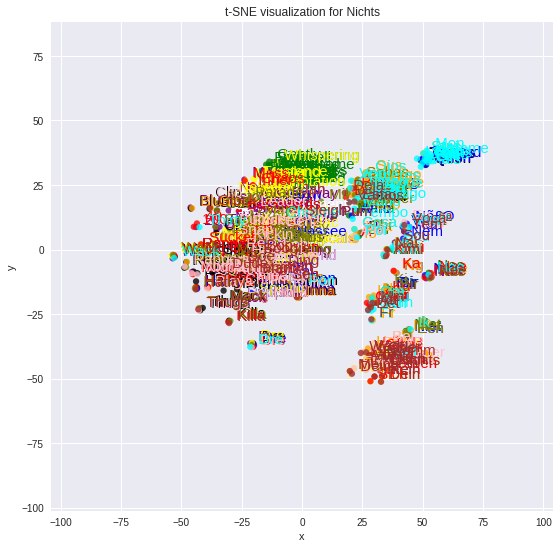

In [64]:
tsnescatterplot(wevec_model, genget_top_words)

## Text Classification
In this section, you'll build a text classifier, determining the genre of a song based on its lyrics.

### Text classification using Bag-of-Words
Build a Naive Bayes classifier based on the bag of Words.  
You will need to divide your dataset into a train and test sets.

In [0]:
from sklearn.model_selection import train_test_split
lyrics_df['clean_sentense'] = lyrics_df['clean_lyrics'].map(lambda words: ' '.join(words)) 
train, test = train_test_split(lyrics_df, test_size=0.2, random_state=999)


X_train = train['clean_sentense'].tolist()
y_train = train['genre'].tolist()


X_test = test['clean_sentense']
y_test = test['genre']

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)


In [67]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [68]:
X_test_dtm = vect.transform(X_test)
y_pred_class = nb.predict(X_test_dtm)
accuracy_score = accuracy_score(y_test, y_pred_class)
accuracy_score



0.49161642803315747

In [0]:
geners = lyrics_df['genre'].unique()


In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
geners = lyrics_df['genre'].unique()
conf_mat = confusion_matrix(
        y_test, y_pred_class, labels = geners)

acc_score = accuracy_score(y_test, y_pred_class)

print(acc_score)

0.49161642803315747


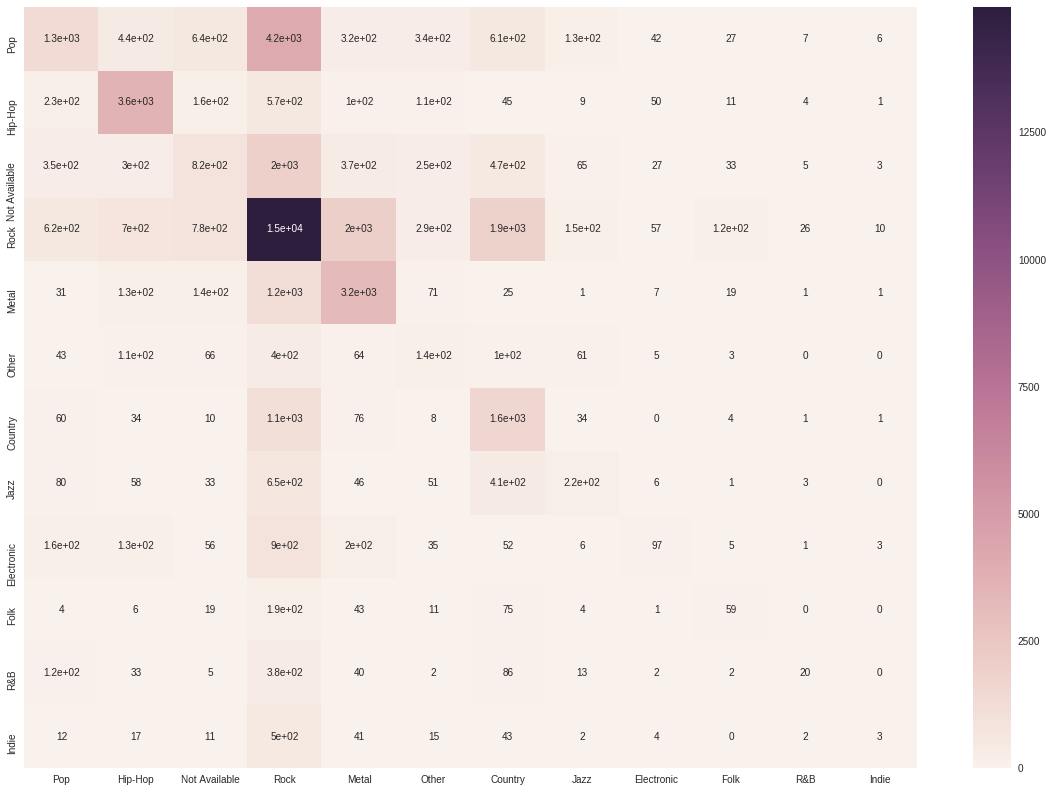

In [71]:
import seaborn as sns

def plt_confusion_matrix(cm, class_names, normalize =False):
  
  if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      
  
  df_cm = pd.DataFrame(cm, index = [i for i in class_names],
                    columns = class_names)
  
  plt.figure(figsize = (20,14))
  sns.heatmap(df_cm, annot=True)

plt_confusion_matrix(conf_mat, geners)

Show the classification report - precision, recall, f1 for each class.

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))


               precision    recall  f1-score   support

      Country       0.30      0.55      0.39      2921
   Electronic       0.33      0.06      0.10      1643
         Folk       0.21      0.14      0.17       412
      Hip-Hop       0.65      0.74      0.69      4944
        Indie       0.11      0.00      0.01       646
         Jazz       0.32      0.14      0.20      1564
        Metal       0.49      0.66      0.56      4830
Not Available       0.30      0.18      0.22      4657
        Other       0.11      0.14      0.12      1002
          Pop       0.44      0.16      0.24      8079
          R&B       0.29      0.03      0.05       694
         Rock       0.55      0.69      0.61     21688

    micro avg       0.49      0.49      0.49     53080
    macro avg       0.34      0.29      0.28     53080
 weighted avg       0.47      0.49      0.46     53080



### Text classification using Word Vectors
#### Average word vectors
Do the same, using a classifier that averages the word vectors of words in the document.

In [75]:
#lyrics_df['t1'] = lyrics_df['clean_lyrics'].map(lambda words: ' '.join(words)) 
def avg_sentense(sentense_words):
    vectors = []
    for word in sentense_words:
      if word in wevec_model.wv:
        vectors.append(wevec_model.wv[word].reshape(1,-1))
      else:
        print(word)
    
    if len(vectors) > 1:
        return np.mean(vectors, axis=0)
    elif len(vectors) ==1:
        return vectors[0]
    else:
      return None

lyrics_df = lyrics_df[lyrics_df.clean_lyrics.notnull()]
lyrics_df['avg_vector'] = lyrics_df["clean_lyrics"].map(lambda sentense: (avg_sentense(sentense)))
train, test = train_test_split(lyrics_df, test_size=0.2, random_state=999)

#X_train = train['lyrics'].tolist()
X_train = train['avg_vector'].tolist()
y_train = train['genre'].tolist()

#X_test = test['lyrics']
X_test = test['avg_vector'].tolist()
y_test = test['genre']

#avg_sentense(lyrics_df['clean_lyrics'][0])
#twitter_lex_df['vector'] = twitter_lex_df["word"].map(lambda word: wevec_model.wv[word].reshape(1,-1) if word in wevec_model.wv else None)

nnnow
nnnnnno
kkinda
kkinda
rringing
eheheheheheheheheheh
eheheheheheheheheheh
eheheheheheheheheheh
eheheheheheheheheheh
girlnono
girlnono
waynono
girlnono
unfairfair
carecare
lfort
tcongratule
taccepte
lcrdit
dfoyers
didaux
qupar
dtpirs
dchappement
do3
ddangereux
trinitrotolune
lviseur
autvoie
lenculeur
dautfois
cmonde
cmonde
shurikn
ctruc
tantt
tantt
soccupe
surin
laorte
qu20
cmonde
gaux
lcaniveau
drechange
sachtera
esclavage
sprennent
damlioration
mouton
tannonce
jprfrerais
tinquite
chemistrywhats
leavewhats
boytell
donneleur
aaaaaaaaaoooo
restgive
breakdownbridge
knowrepeat
heroins
squarecut
tonightlets
pepsis
hookbeyonce
fiftyeleven
harmon
lewinskyed
lactivitã©
coã¯t
tintã©resses
fã©ministes
dã©testent
chingchingching
beesyay
beesyay
waw
lassemblage
grugrugrubbing
hookbridge
youyeaaa
uhoooooooooooo
uhoooooooooooooo
headi
strangeit
wordsyouve
necki
mefeels
headi
strangeit
wordsyouve
bodywhile
tonightlets
oyeuhum
identidadque
adisdime
zinatis
titick
mput
bgrown
byoure
waydat
alongsi

In [0]:
# nb = MultinomialNB()
# # nb.fit([[1,2,3], [2,3,4]], [1,2])
# train, test = train_test_split(lyrics_df, test_size=0.2, random_state=999)
# train_x_data = train['avg_vector'].tolist()




In [0]:

from sklearn.naive_bayes import MultinomialNB
X_train = np.asanyarray(X_train)
X_train = X_train.reshape((212318,300))

X_test1 = np.asanyarray(X_test)
X_test1 = X_test1.reshape((-1, 300))


# # X_train[0.shape
# nb = MultinomialNB()
# nb.fit(xx, y_train)


In [0]:
X_test1.shape


In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)
X_test1 = scaler.transform(X_test1)
#X_scaled = preprocessing.scale(X_train)

In [0]:
translator = {}
translator2 = {}
for index, y in  enumerate(set(y_train)):
    translator[index] = y
    translator2[y] = index
    
# (X_train.shape, len(y_train))
# nb = MultinomialNB()
# nb.fit(X_scaled, y_train)

In [0]:
y_train_numbers = [translator2[y] for y in y_train]

In [0]:
# (X_train.shape, len(y_train))
nb = MultinomialNB()
nb.fit(X_scaled, y_train_numbers)

In [0]:
y_pred_class = nb.predict(X_test1)
res = [translator[y1] for y1 in y_pred_class]
acc_score = accuracy_score(y_test, res)
acc_score

#### TfIdf Weighting
Do the same, using a classifier that averages the word vectors of words in the document, weighting each word by its TfIdf.


### Text classification using ConvNet
Do the same, using a ConvNet.  
The ConvNet should get as input a 2D matrix where each column is an embedding vector of a single word, and words are in order. Use zero padding so that all matrices have a similar length.  
Some songs might be very long. Trim them so you keep a maximum of 128 words (after cleaning stop words and rare words).  
Initialize the embedding layer using the word vectors that you've trained before, but allow them to change during training.  

Extra: Try training the ConvNet with 2 slight modifications:
1. freezing the the weights trained using Word2vec (preventing it from updating)
1. random initialization of the embedding layer

You are encouraged to try this question on your own.  

You might prefer to get ideas from the paper "Convolutional Neural Networks for Sentence Classification" (Kim 2014, [link](https://arxiv.org/abs/1408.5882)).

There are several implementations of the paper code in PyTorch online (see for example [this repo](https://github.com/prakashpandey9/Text-Classification-Pytorch) for a PyTorch implementation of CNN and other architectures for text classification). If you get stuck, they might provide you with a reference for your own code.